# Etapa 3 - Machine Learning

## Imports

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef, ConfusionMatrixDisplay, precision_score)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV

%matplotlib inline

warnings.filterwarnings('ignore')

# rand = 1483433244

# Functions

Metrics

In [2]:
def metrics(label_test, predict):
    print('METRICS:')
    print(f"Accuracy score:\n{accuracy_score(label_test, predict)}\n")
    print(f"Recall score:\n{recall_score(label_test, predict, average='weighted')}\n")
    print(f"Precison score:\n{precision_score(label_test, predict, average='weighted', zero_division=0)}\n")
    print(f"F1-score:\n{f1_score(label_test, predict, average='weighted')}\n")
    print(f"MCC score:\n{matthews_corrcoef(label_test, predict)}\n")
    print(f"Confusion matrix:\n{confusion_matrix(label_test, predict)}\n")
    print(f"Classification report:\n{classification_report(label_test, predict, zero_division=True)}\n")
    ConfusionMatrixDisplay(confusion_matrix(label_test, predict)).plot(cmap=plt.cm.Blues)


ML

In [3]:
def ml(model, dataset, labels, param=None, rand=None):
    # SPLIT
    data_train, data_test, label_train, label_test = train_test_split(dataset, labels, test_size=0.3)

    # k-fold
    kfold = StratifiedKFold(n_splits=5, random_state=rand, shuffle=False)
    # Cross validation
    scores_scoring = cross_val_score(model, X=data_train, y=label_train, cv=kfold, scoring='accuracy')
    print(f'Cross Validation accuracy score: {np.mean(scores_scoring)}\n')

    # model training - FIT
    model.fit(data_train, label_train)

    # PREDICT
    predict = model.predict(X=data_test)
    base_model = accuracy_score(label_test, predict)
    print('Base Model Accuracy: {:.3f}\n'.format(base_model))

    if param != None:
        ## OPTIMIZATION
        search = HalvingGridSearchCV(estimator=model, param_grid=param, cv=kfold, scoring='accuracy', random_state=rand,
                                     n_jobs=-1)
        # search = HalvingRandomSearchCV(estimator=model, param_distributions=param, cv=kfold, scoring='accuracy',
        #                                random_state=rand, n_jobs=-1)
        search.fit(X=data_train, y=label_train)

        best_params = search.best_params_
        print(f'{best_params}\n')
        # OPTI MODEL FITTED
        best_model = search.best_estimator_
        predict_opt = best_model.predict(X=data_test)
        opt_model = accuracy_score(label_test, predict_opt)
        print('Optimized Model Accuracy: {:.3f}\n'.format(opt_model))

        improv = ((opt_model-base_model)/base_model*100)
        print('Optimized model improved {:.3f}% over base model.\n'.format(improv))

        if improv >= 0:
            predict = predict_opt

    # Metrics
    metrics(label_test, predict)

The *ml* function will firstly do a cross validation to evaluate the model adaptation to the data. Secondly, it will fit the model and then predict the test set labels and it's corresponding accuracy. Lastly, it will do a hyperparameter optimization and then use the best parameters to predict the test set labels and it's accuracy.

# Models

In [4]:
rf = RandomForestClassifier(n_jobs=-1)
nb = GaussianNB()
knn = KNeighborsClassifier(n_jobs=-1)
voting = VotingClassifier(estimators=[('Random Forest', rf), ('Naive Bayes', nb), ('KNN', knn)], voting='soft', n_jobs=-1)
nn = MLPClassifier(early_stopping=True)

# Hyperparameters

In [5]:
params_rf = {'n_estimators': range(10, 211, 50), 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt', 'log2', None],
          'bootstrap': [True, False]}
params_knn = {'n_neighbors': range(2, 11, 2), 'weights': ['distance', 'uniform'], 'leaf_size': range(10, 50, 10), 'p': [1, 2]}
params_nn = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Binary Classification

### Load data

In [6]:
descriptors = pd.read_csv('../dataset/binary_class/descriptors_fs.csv', sep=',')
fingerprint = pd.read_csv('../dataset/binary_class/rdk_fs.csv', sep=',')

descriptors_data_b = descriptors.drop("activity", axis=1)
descriptors_label_b = descriptors["activity"]
fingerprint_data_b = fingerprint.drop("activity", axis=1)
fingerprint_label_b = fingerprint["activity"]

## Descriptors

### Random Forest

Cross Validation accuracy score: 0.8167690142187769

Base Model Accuracy: 0.814

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 210}

Optimized Model Accuracy: 0.825

Optimized model improved 1.383% over base model.

METRICS:
Accuracy score:
0.8249562390597649

Recall score:
0.8249562390597649

Precison score:
0.8250103766937189

F1-score:
0.8249428545125113

MCC score:
0.6499516363947181

Confusion matrix:
[[5014 1008]
 [1092 4883]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      6022
           1       0.83      0.82      0.82      5975

    accuracy                           0.82     11997
   macro avg       0.83      0.82      0.82     11997
weighted avg       0.83      0.82      0.82     11997




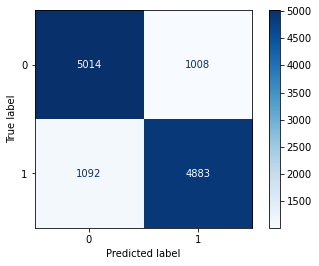

In [7]:
ml(rf, descriptors_data_b, descriptors_label_b, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.700628908303625

Base Model Accuracy: 0.698

METRICS:
Accuracy score:
0.6975077102608985

Recall score:
0.6975077102608985

Precison score:
0.6978109891185129

F1-score:
0.697409401972181

MCC score:
0.3953367814679376

Confusion matrix:
[[4287 1701]
 [1928 4081]]

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      5988
           1       0.71      0.68      0.69      6009

    accuracy                           0.70     11997
   macro avg       0.70      0.70      0.70     11997
weighted avg       0.70      0.70      0.70     11997




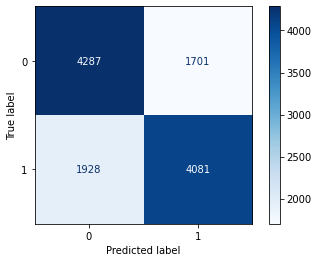

In [8]:
ml(nb, descriptors_data_b, descriptors_label_b, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.7918688907406461

Base Model Accuracy: 0.803

{'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Optimized Model Accuracy: 0.820

Optimized model improved 2.128% over base model.

METRICS:
Accuracy score:
0.8200383429190631

Recall score:
0.8200383429190631

Precison score:
0.821265246730681

F1-score:
0.8198477575158695

MCC score:
0.6412708887254108

Confusion matrix:
[[5122  892]
 [1267 4716]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      6014
           1       0.84      0.79      0.81      5983

    accuracy                           0.82     11997
   macro avg       0.82      0.82      0.82     11997
weighted avg       0.82      0.82      0.82     11997




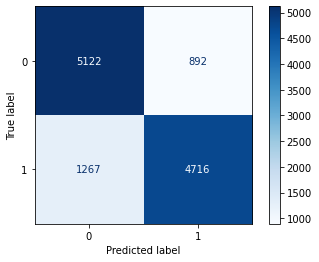

In [9]:
ml(knn, descriptors_data_b, descriptors_label_b, params_knn)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.7689337611390182

Base Model Accuracy: 0.773

METRICS:
Accuracy score:
0.7731099441527048

Recall score:
0.7731099441527048

Precison score:
0.7749555324440315

F1-score:
0.7727789824130432

MCC score:
0.5481270726434556

Confusion matrix:
[[4855 1120]
 [1602 4420]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      5975
           1       0.80      0.73      0.76      6022

    accuracy                           0.77     11997
   macro avg       0.77      0.77      0.77     11997
weighted avg       0.77      0.77      0.77     11997




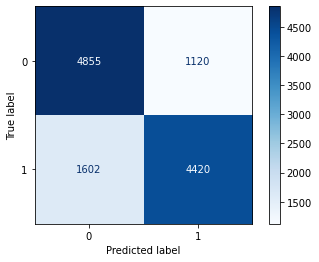

In [10]:
ml(voting, descriptors_data_b, descriptors_label_b, None)

### Neural Network

Cross Validation accuracy score: 0.7982637638617778

Base Model Accuracy: 0.800

{'activation': 'relu', 'learning_rate': 'constant'}

Optimized Model Accuracy: 0.803

Optimized model improved 0.365% over base model.

METRICS:
Accuracy score:
0.8030340918562974

Recall score:
0.8030340918562974

Precison score:
0.8030501082412916

F1-score:
0.80301994984085

MCC score:
0.6060388585556704

Confusion matrix:
[[4735 1213]
 [1150 4899]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5948
           1       0.80      0.81      0.81      6049

    accuracy                           0.80     11997
   macro avg       0.80      0.80      0.80     11997
weighted avg       0.80      0.80      0.80     11997




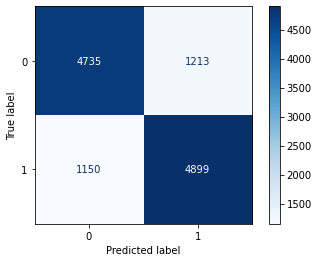

In [11]:
ml(nn, descriptors_data_b, descriptors_label_b, params_nn)

## Fingerprints

### Random Forest

Cross Validation accuracy score: 0.8037723267712087

Base Model Accuracy: 0.811

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 210}

Optimized Model Accuracy: 0.816

Optimized model improved 0.617% over base model.

METRICS:
Accuracy score:
0.8157039259814953

Recall score:
0.8157039259814953

Precison score:
0.8157779180719127

F1-score:
0.8156659167392267

MCC score:
0.6313873312287823

Confusion matrix:
[[5022 1048]
 [1163 4764]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      6070
           1       0.82      0.80      0.81      5927

    accuracy                           0.82     11997
   macro avg       0.82      0.82      0.82     11997
weighted avg       0.82      0.82      0.82     11997




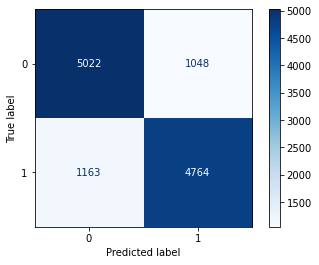

In [12]:
ml(rf, fingerprint_data_b, fingerprint_label_b, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.6642733055799468

Base Model Accuracy: 0.659

METRICS:
Accuracy score:
0.6589980828540468

Recall score:
0.6589980828540468

Precison score:
0.6589994731743735

F1-score:
0.6589987368064278

MCC score:
0.3179561390493684

Confusion matrix:
[[3999 2047]
 [2044 3907]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6046
           1       0.66      0.66      0.66      5951

    accuracy                           0.66     11997
   macro avg       0.66      0.66      0.66     11997
weighted avg       0.66      0.66      0.66     11997




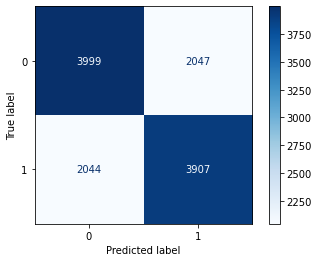

In [13]:
ml(nb, fingerprint_data_b, fingerprint_label_b, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.7723005837119002

Base Model Accuracy: 0.785

METRICS:
Accuracy score:
0.7846128198716346

Recall score:
0.7846128198716346

Precison score:
0.7886630619329894

F1-score:
0.7838590076299586

MCC score:
0.5732679673237986

Confusion matrix:
[[5060  937]
 [1647 4353]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      5997
           1       0.82      0.73      0.77      6000

    accuracy                           0.78     11997
   macro avg       0.79      0.78      0.78     11997
weighted avg       0.79      0.78      0.78     11997




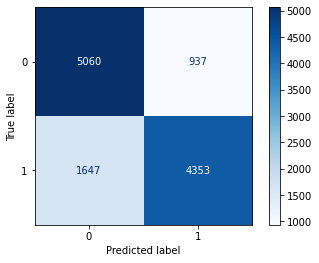

In [14]:
ml(knn, fingerprint_data_b, fingerprint_label_b, None)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.747472577945291

Base Model Accuracy: 0.755

METRICS:
Accuracy score:
0.7550220888555472

Recall score:
0.7550220888555472

Precison score:
0.7555432802487837

F1-score:
0.7549303664840812

MCC score:
0.510601261104675

Confusion matrix:
[[4633 1340]
 [1599 4425]]

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5973
           1       0.77      0.73      0.75      6024

    accuracy                           0.76     11997
   macro avg       0.76      0.76      0.75     11997
weighted avg       0.76      0.76      0.75     11997




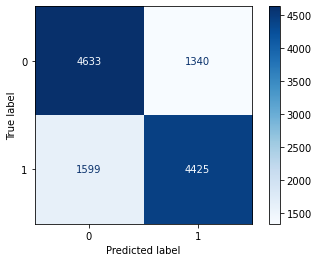

In [15]:
ml(voting, fingerprint_data_b, fingerprint_label_b, None)

### Neural Network

Cross Validation accuracy score: 0.7739077073235848

Base Model Accuracy: 0.791

METRICS:
Accuracy score:
0.7905309660748521

Recall score:
0.7905309660748521

Precison score:
0.7905310119889472

F1-score:
0.7905309835393534

MCC score:
0.5810615239867741

Confusion matrix:
[[4748 1257]
 [1256 4736]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6005
           1       0.79      0.79      0.79      5992

    accuracy                           0.79     11997
   macro avg       0.79      0.79      0.79     11997
weighted avg       0.79      0.79      0.79     11997




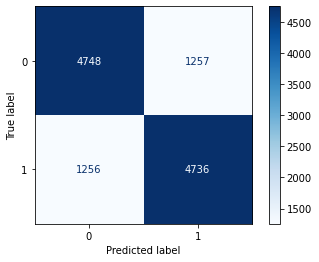

In [16]:
ml(nn, fingerprint_data_b, fingerprint_label_b, None)

# Multiclass

### Load data

In [17]:
descriptors = pd.read_csv('../dataset/multiclass/descriptors_fs.csv', sep=',')
fingerprint = pd.read_csv('../dataset/multiclass/rdk_fs.csv', sep=',')

descriptors_data_m = descriptors.drop("Activity at 46.23 uM", axis=1)
descriptors_label_m = descriptors["Activity at 46.23 uM"]
fingerprint_data_m = fingerprint.drop("Activity at 46.23 uM", axis=1)
fingerprint_label_m = fingerprint["Activity at 46.23 uM"]

### Random Forest

Cross Validation accuracy score: 0.5676621042100294

Base Model Accuracy: 0.579

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 210}

Optimized Model Accuracy: 0.581

Optimized model improved 0.461% over base model.

METRICS:
Accuracy score:
0.5813953488372093

Recall score:
0.5813953488372093

Precison score:
0.53872817133716

F1-score:
0.5244405595507412

MCC score:
0.36863665984755034

Confusion matrix:
[[ 139 1169  303    5]
 [ 176 3347  895    9]
 [  21  771 3371  188]
 [   3  168 1314  118]]

Classification report:
              precision    recall  f1-score   support

           0       0.41      0.09      0.14      1616
           1       0.61      0.76      0.68      4427
           2       0.57      0.77      0.66      4351
           3       0.37      0.07      0.12      1603

    accuracy                           0.58     11997
   macro avg       0.49      0.42      0.40     11997
weighted avg       0.54      0.58      0.52     11997




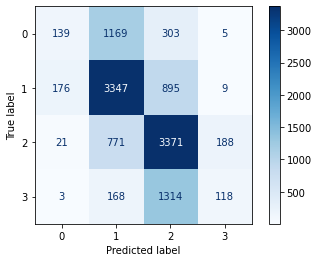

In [18]:
ml(rf, descriptors_data_m, descriptors_label_m, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.39489837700691843

Base Model Accuracy: 0.399

METRICS:
Accuracy score:
0.398849712428107

Recall score:
0.398849712428107

Precison score:
0.41276107322066524

F1-score:
0.39151367266147413

MCC score:
0.16238228024859214

Confusion matrix:
[[ 249  819  291  207]
 [ 478 2489  949  477]
 [ 153 1299 1257 1750]
 [  47  343  399  790]]

Classification report:
              precision    recall  f1-score   support

           0       0.27      0.16      0.20      1566
           1       0.50      0.57      0.53      4393
           2       0.43      0.28      0.34      4459
           3       0.25      0.50      0.33      1579

    accuracy                           0.40     11997
   macro avg       0.36      0.38      0.35     11997
weighted avg       0.41      0.40      0.39     11997




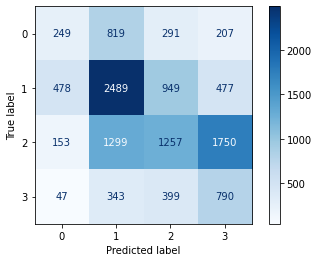

In [19]:
ml(nb, descriptors_data_m, descriptors_label_m, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.5171120359687564

Base Model Accuracy: 0.522

METRICS:
Accuracy score:
0.5222972409769109

Recall score:
0.5222972409769109

Precison score:
0.49373009404699525

F1-score:
0.5013704561080207

MCC score:
0.29111356573583885

Confusion matrix:
[[ 329 1005  256   26]
 [ 604 2856  847   81]
 [ 195  938 2847  420]
 [  43  230 1086  234]]

Classification report:
              precision    recall  f1-score   support

           0       0.28      0.20      0.24      1616
           1       0.57      0.65      0.61      4388
           2       0.57      0.65      0.60      4400
           3       0.31      0.15      0.20      1593

    accuracy                           0.52     11997
   macro avg       0.43      0.41      0.41     11997
weighted avg       0.49      0.52      0.50     11997




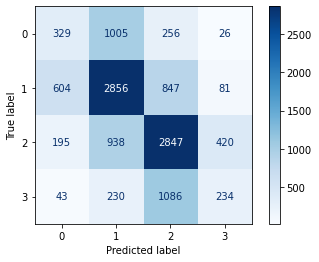

In [20]:
ml(knn, descriptors_data_m, descriptors_label_m, None)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.5060376090483671

Base Model Accuracy: 0.510

METRICS:
Accuracy score:
0.510460948570476

Recall score:
0.510460948570476

Precison score:
0.48641569507595767

F1-score:
0.48894295946010197

MCC score:
0.2780506712926585

Confusion matrix:
[[ 168 1049  313   83]
 [ 259 2965  952  172]
 [  78  940 2537  836]
 [  19  225  947  454]]

Classification report:
              precision    recall  f1-score   support

           0       0.32      0.10      0.16      1613
           1       0.57      0.68      0.62      4348
           2       0.53      0.58      0.56      4391
           3       0.29      0.28      0.28      1645

    accuracy                           0.51     11997
   macro avg       0.43      0.41      0.40     11997
weighted avg       0.49      0.51      0.49     11997




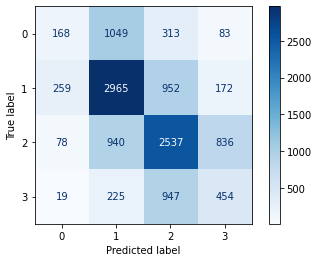

In [21]:
ml(voting, descriptors_data_m, descriptors_label_m, None)

### Neural Network

Cross Validation accuracy score: 0.5565522756736851

Base Model Accuracy: 0.555

METRICS:
Accuracy score:
0.5546386596649162

Recall score:
0.5546386596649162

Precison score:
0.5147805654844219

F1-score:
0.4875066310554618

MCC score:
0.3221803990659744

Confusion matrix:
[[ 101 1208  323    3]
 [ 110 3192 1011    7]
 [  29 1055 3322   54]
 [   8  253 1282   39]]

Classification report:
              precision    recall  f1-score   support

           0       0.41      0.06      0.11      1635
           1       0.56      0.74      0.64      4320
           2       0.56      0.74      0.64      4460
           3       0.38      0.02      0.05      1582

    accuracy                           0.55     11997
   macro avg       0.48      0.39      0.36     11997
weighted avg       0.51      0.55      0.49     11997




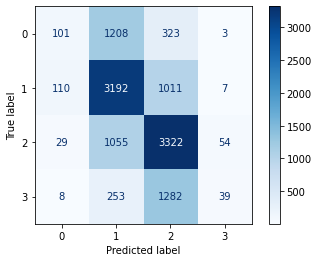

In [22]:
ml(nn, descriptors_data_m, descriptors_label_m, None)

## Fingerprints

### Random Forest

Cross Validation accuracy score: 0.5471011991691213

Base Model Accuracy: 0.551

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 160}

Optimized Model Accuracy: 0.555

Optimized model improved 0.666% over base model.

METRICS:
Accuracy score:
0.5546386596649162

Recall score:
0.5546386596649162

Precison score:
0.5142238813764338

F1-score:
0.520148235444327

MCC score:
0.33301003116125455

Confusion matrix:
[[ 223 1066  297   14]
 [ 384 3029  901   43]
 [  60  748 3185  425]
 [  12  206 1187  217]]

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20      1600
           1       0.60      0.70      0.64      4357
           2       0.57      0.72      0.64      4418
           3       0.31      0.13      0.19      1622

    accuracy                           0.55     11997
   macro avg       0.45      0.42      0.42     11997
weighted avg       0.51      0.55      0.52     11997



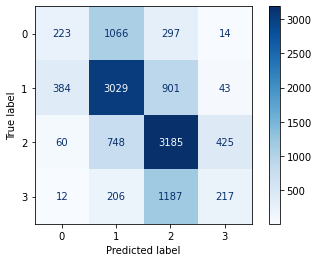

In [23]:
ml(rf, fingerprint_data_m, fingerprint_label_m, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.3545529266601415

Base Model Accuracy: 0.350

METRICS:
Accuracy score:
0.3500041677085938

Recall score:
0.3500041677085938

Precison score:
0.3913173287162848

F1-score:
0.35214167393271006

MCC score:
0.12607005303493846

Confusion matrix:
[[ 362  689  219  263]
 [ 866 2050  791  725]
 [ 457 1069  983 1895]
 [ 130  336  358  804]]

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22      1533
           1       0.49      0.46      0.48      4432
           2       0.42      0.22      0.29      4404
           3       0.22      0.49      0.30      1628

    accuracy                           0.35     11997
   macro avg       0.33      0.35      0.32     11997
weighted avg       0.39      0.35      0.35     11997




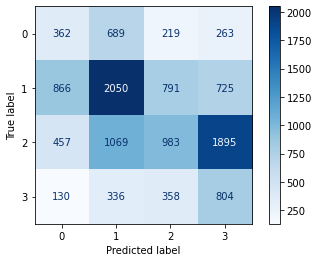

In [24]:
ml(nb, fingerprint_data_m, fingerprint_label_m, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.5114849210364658

Base Model Accuracy: 0.527

METRICS:
Accuracy score:
0.5265483037426023

Recall score:
0.5265483037426023

Precison score:
0.49441828678157074

F1-score:
0.5029760725424355

MCC score:
0.29658436072482003

Confusion matrix:
[[ 332  928  337   43]
 [ 559 2670 1002   87]
 [ 172  758 3116  419]
 [  53  203 1119  199]]

Classification report:
              precision    recall  f1-score   support

           0       0.30      0.20      0.24      1640
           1       0.59      0.62      0.60      4318
           2       0.56      0.70      0.62      4465
           3       0.27      0.13      0.17      1574

    accuracy                           0.53     11997
   macro avg       0.43      0.41      0.41     11997
weighted avg       0.49      0.53      0.50     11997




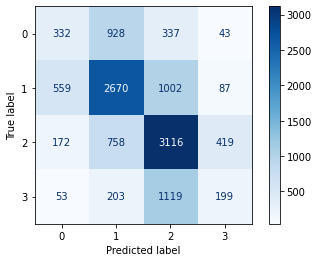

In [25]:
ml(knn, fingerprint_data_m, fingerprint_label_m, None)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.46954566416028587

Base Model Accuracy: 0.484

METRICS:
Accuracy score:
0.4837042593981829

Recall score:
0.4837042593981829

Precison score:
0.48343943335958933

F1-score:
0.4813691657830793

MCC score:
0.25835731998360656

Confusion matrix:
[[ 266  904  264  140]
 [ 509 2679  850  370]
 [ 183  777 2311 1116]
 [  68  208  805  547]]

Classification report:
              precision    recall  f1-score   support

           0       0.26      0.17      0.20      1574
           1       0.59      0.61      0.60      4408
           2       0.55      0.53      0.54      4387
           3       0.25      0.34      0.29      1628

    accuracy                           0.48     11997
   macro avg       0.41      0.41      0.41     11997
weighted avg       0.48      0.48      0.48     11997




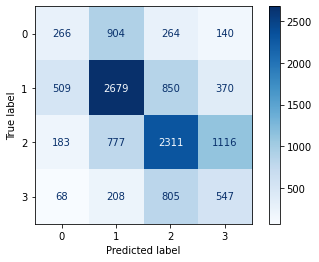

In [26]:
ml(voting, fingerprint_data_m, fingerprint_label_m, None)

### Neural Network

Cross Validation accuracy score: 0.5326689532230946

Base Model Accuracy: 0.538

METRICS:
Accuracy score:
0.5377177627740268

Recall score:
0.5377177627740268

Precison score:
0.45904911983954866

F1-score:
0.4587493923810659

MCC score:
0.29444643152894184

Confusion matrix:
[[  13 1267  317    1]
 [  29 3447  896   12]
 [   5 1356 2975   42]
 [   6  401 1214   16]]

Classification report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.02      1598
           1       0.53      0.79      0.64      4384
           2       0.55      0.68      0.61      4378
           3       0.23      0.01      0.02      1637

    accuracy                           0.54     11997
   macro avg       0.39      0.37      0.32     11997
weighted avg       0.46      0.54      0.46     11997




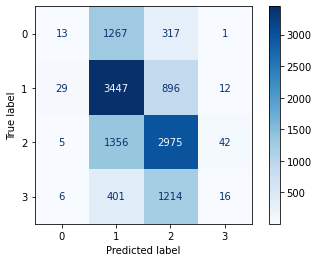

In [27]:
ml(nn, fingerprint_data_m, fingerprint_label_m, None)